In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../input/cinema-ticket/cinemaTicket_Ref.csv')
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [3]:
df['cinema_code'].value_counts()

524    2474
489    2407
448    2345
163    2241
518    2193
       ... 
520      12
565      10
637       5
566       2
424       1
Name: cinema_code, Length: 246, dtype: int64

In [4]:
df.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use        int64
capacity        float64
date             object
month             int64
quarter           int64
day               int64
dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.dtypes

film_code                int64
cinema_code              int64
total_sales              int64
tickets_sold             int64
tickets_out              int64
show_time                int64
occu_perc              float64
ticket_price           float64
ticket_use               int64
capacity               float64
date            datetime64[ns]
month                    int64
quarter                  int64
day                      int64
dtype: object

In [7]:
df['date'].value_counts()

2018-05-15    790
2018-05-08    784
2018-05-11    778
2018-05-10    774
2018-05-09    766
             ... 
2018-06-05      4
2018-10-30      2
2018-02-23      1
2018-02-21      1
2018-09-21      1
Name: date, Length: 234, dtype: int64

In [8]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [9]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,2018
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,2018
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,2018
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,2018
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,2018


In [10]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
year              0
dtype: int64

In [11]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
year            0
dtype: int64

In [12]:
df.shape

(142399, 15)

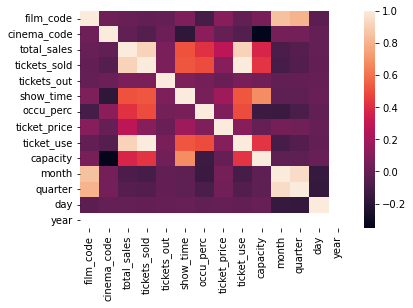

In [13]:
sns.heatmap(df.corr())
plt.show()

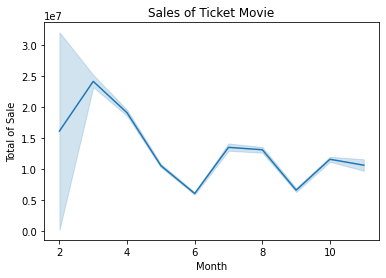

In [14]:
sns.lineplot(x=df['month'],y=df['total_sales'])

plt.title("Sales of Ticket Movie")
plt.xlabel("Month")
plt.ylabel("Total of Sale")

plt.show()

In [15]:
df['film_code'].value_counts()

1554    11613
1493    10490
1481     9525
1484     8623
1482     7394
1556     6979
1483     6970
1485     6073
1494     6022
1498     5544
1499     5187
1576     4431
1497     3911
1559     3649
1572     3581
1558     3548
1511     3250
1495     2958
1553     2850
1573     2444
1552     2444
1486     2294
1551     2268
1562     2144
1578     1847
1575     1589
1496     1443
1480     1386
1563     1301
1492     1086
1564     1044
1569      987
1560      931
1550      678
1568      663
1500      633
1502      601
1512      565
1566      558
1571      552
1471      466
1557      418
1587      414
1570      341
1565      313
1567      285
1589       67
1584       39
Name: film_code, dtype: int64

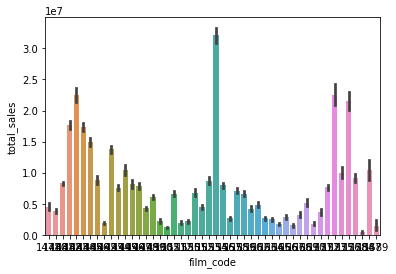

In [16]:
sns.barplot(x=df['film_code'],y=df['total_sales'])

plt.show()

In [17]:
df['quarter'].value_counts()

2    58229
3    54029
4    22172
1     7969
Name: quarter, dtype: int64

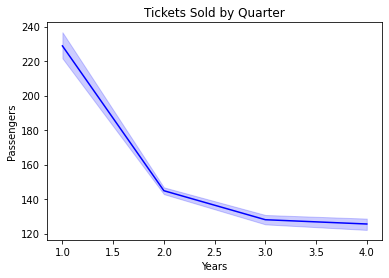

In [18]:
sns.lineplot(data=df, x="quarter", y="tickets_sold",color="b")

plt.title("Tickets Sold by Quarter")
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.show()

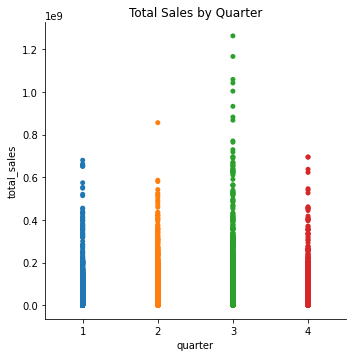

In [19]:
sns.catplot(x="quarter", y="total_sales", data=df,jitter=False)

plt.title("Total Sales by Quarter")

plt.show()

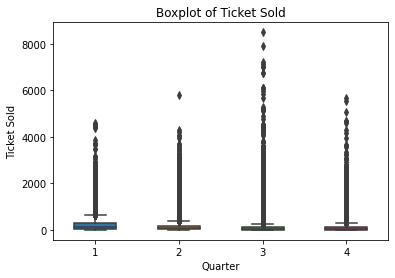

In [20]:
sns.boxplot( x=df["quarter"], y=df["tickets_sold"],width=0.5)

plt.title("Boxplot of Ticket Sold")
plt.ylabel("Ticket Sold")
plt.xlabel("Quarter")

plt.show()

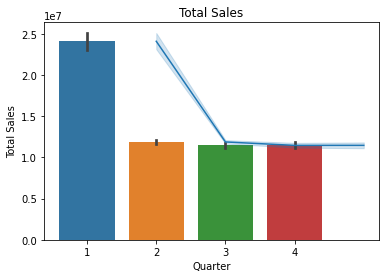

In [21]:
sns.barplot(x=df['quarter'],y=df['total_sales'])
sns.lineplot(x=df['quarter'],y=df['total_sales'])

plt.title("Total Sales")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()

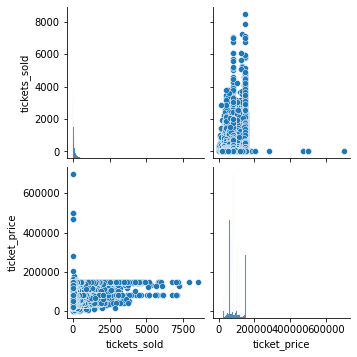

In [22]:
sns.pairplot(data=df, vars=["tickets_sold", "ticket_price"])

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


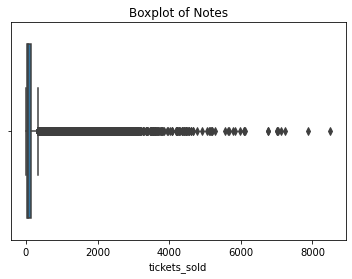

In [23]:
sns.boxplot(df['tickets_sold'])

plt.title("Boxplot of Notes")

plt.show()

In [24]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,2018
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,2018
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,2018
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,2018
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,2018


In [25]:
X = df[['ticket_price', 'occu_perc', 'show_time', 'tickets_sold']]
y = df['total_sales']

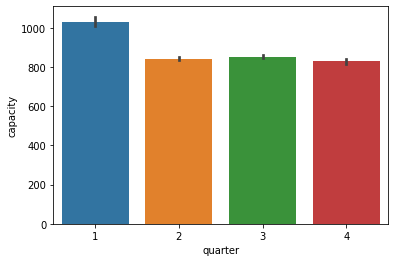

In [26]:
sns.barplot(x=df['quarter'],y=df['capacity'])

plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

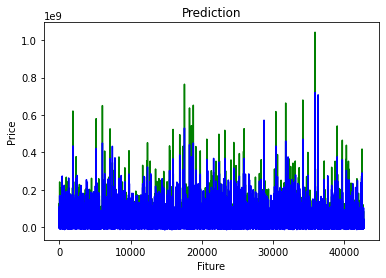

In [30]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='g',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Fiture')
plt.ylabel('Price')
plt.title('Prediction')
plt.show()

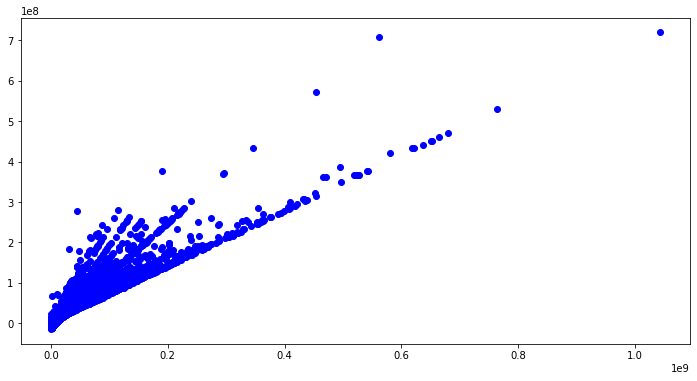

In [31]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='b',linestyle='-')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8679348967732425

In [34]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 4907683.225380731
MSE: 115523980276191.83
RMSE: 10748208.235617314
